In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [191]:
phishing = pd.read_csv('dataset/phishing.csv').dropna() * 1
phishing = phishing.astype({'Encoding':'string','HTML content':'int'})
clean = pd.read_csv('dataset/clean.csv').dropna() * 1
clean = clean.astype({'Encoding':'string','HTML content':'int'})
df =  pd.concat([phishing,clean])

In [192]:
i = 0
for col in df.columns:
    print(i,col)
    i+=1

df.describe().T

0 Unnamed: 0
1 @ in URLs
2 Attachments
3 BanWords
4 Css
5 Encoding
6 External Resources
7 Flash content
8 HTML content
9 Html Form
10 Html iFrame
11 IPs in URLs
12 Javascript
13 Phishy
14 URLs


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6801.0,1898.028378,1259.928668,0.0,854.0,1704.0,2853.0,4553.0
@ in URLs,6801.0,0.001029,0.032068,0.0,0.0,0.0,0.0,1.0
Attachments,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BanWords,6801.0,15.660932,17.133825,0.0,3.0,10.0,22.0,143.0
Css,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
External Resources,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Flash content,6801.0,0.001176,0.034280,0.0,0.0,0.0,0.0,1.0
HTML content,6801.0,0.731069,0.443437,0.0,0.0,1.0,1.0,1.0
Html Form,6801.0,0.021762,0.145915,0.0,0.0,0.0,0.0,1.0
Html iFrame,6801.0,0.001617,0.040187,0.0,0.0,0.0,0.0,1.0


In [193]:
df = df.drop(df.columns[[0,2,4,6,5,12]], axis = 1)
ph = df.pop('Phishy')
df['Phishy'] = ph
print(df)

      @ in URLs  BanWords  Flash content  HTML content  Html Form  \
0             0        22              0             1          0   
1             0        13              0             1          0   
2             0        27              0             1          0   
3             0        79              0             1          0   
4             0         5              0             1          0   
...         ...       ...            ...           ...        ...   
2251          0         0              0             0          0   
2252          0         0              0             0          0   
2253          0         0              0             0          0   
2254          0         2              0             0          0   
2255          0         9              0             0          0   

      Html iFrame  IPs in URLs  URLs  Phishy  
0               0            0     2       1  
1               0            1     7       1  
2               0            1

In [194]:
xo = df.iloc[:,:-1].values
yo = df.iloc[:,-1].values

In [195]:
from sklearn.model_selection import train_test_split
(x_train_o,x_test_o, y_train_o,y_test_o) = train_test_split(xo,yo,test_size = 0.25, random_state = 0)

In [196]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_o = sc.fit_transform(x_train_o)
x_test_o = sc.transform(x_test_o)

In [197]:
from imblearn.over_sampling import ADASYN
print('Original data shape,', x_train_o.shape)
ada = ADASYN()
x_train, y_train = ada.fit_resample(x_train_o,y_train_o)
print('Resampled data shape,', x_train.shape)

Original data shape, (5100, 8)
Resampled data shape, (6867, 8)


In [198]:
np.sum(y_train)

3410

In [240]:
def cf_mat(model,lb,color):
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
    import seaborn as snf
    labels = ['not phishing','phishing']
    plt.figure(figsize=(11,11))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test_o)
    hm = snf.heatmap(confusion_matrix(y_test_o,y_pred), cmap=color,square = True, annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
    hm.set(xlabel="Predicted value",ylabel="True value",title=lb)
    # plt.ylabel("True value")
    # plt.xlabel("Predicted value")
    # plt.title(lb)
    accuracy, f1, precision = accuracy_score(y_test, y_pred) * 100,f1_score(y_test, y_pred) * 100, precision_score(y_test, y_pred) * 100
    plt.show()
    fake = pd.DataFrame({'Metrics': ['Accuracy', 'F1', 'Precision'], 'val': [accuracy, f1, precision]})
    plt.figure(figsize=(7,7))
    ax = snf.barplot(y = 'val', x = 'Metrics', 
              data = fake, 
              hue='Metrics')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    # ax.set(xlabel='common xlabel', ylabel='common ylabel')
    plt.figure(figsize=(11,11))
    plt.show()
    print("Accuracy of the model on",lb,"is: ","{:.2f}".format(accuracy_score(y_test, y_pred) * 100),'%')
    print("F1 score of the model on",lb,"is: ","{:.2f}".format(f1_score(y_test, y_pred) * 100),'%')
    print("Precision score of the model on",lb,"is: ","{:.2f}".format(precision_score(y_test, y_pred) * 100),'%')

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

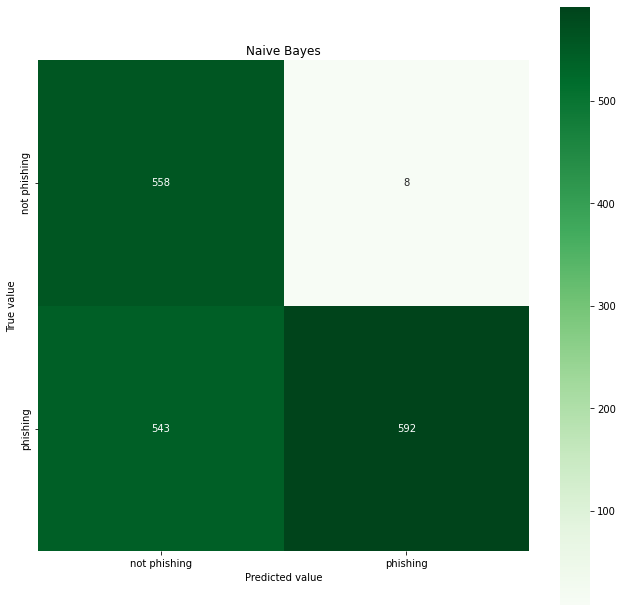

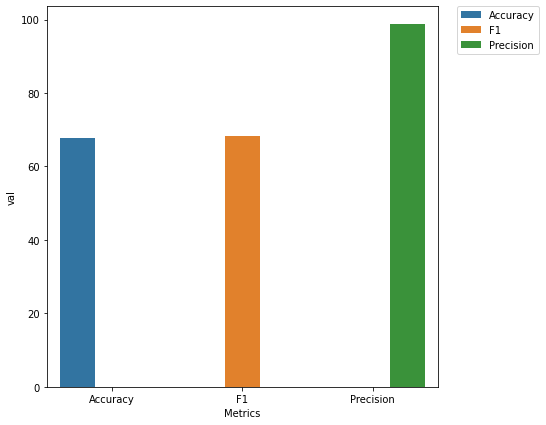

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Naive Bayes is:  67.61 %
F1 score of the model on Naive Bayes is:  68.24 %
Precision score of the model on Naive Bayes is:  98.67 %


In [242]:
nb_classifier = GaussianNB()
cf_mat(nb_classifier,"Naive Bayes","Greens")

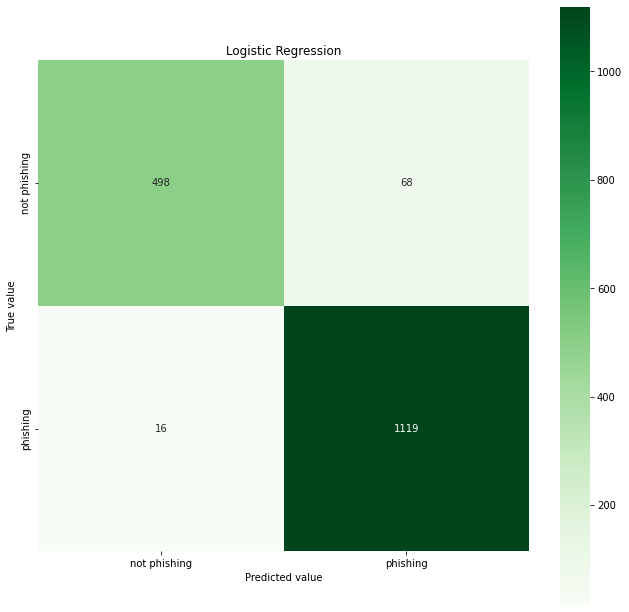

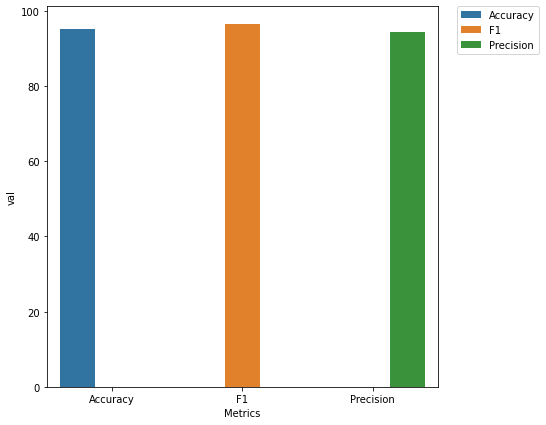

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Logistic Regression is:  95.06 %
F1 score of the model on Logistic Regression is:  96.38 %
Precision score of the model on Logistic Regression is:  94.27 %


In [243]:
lr_classifier = LogisticRegression()
cf_mat(lr_classifier,"Logistic Regression","Greens")

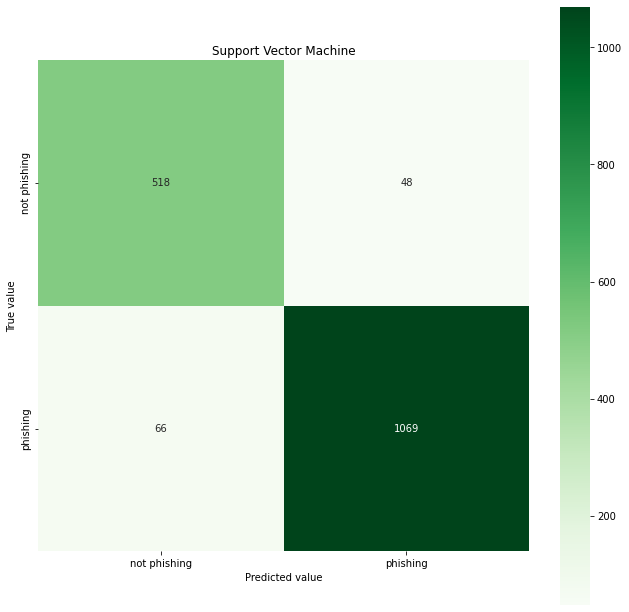

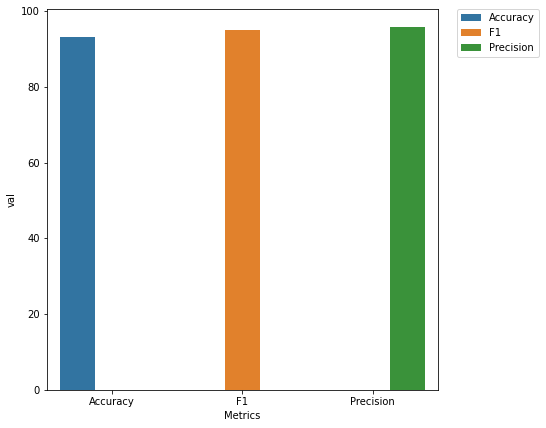

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Support Vector Machine is:  93.30 %
F1 score of the model on Support Vector Machine is:  94.94 %
Precision score of the model on Support Vector Machine is:  95.70 %


In [244]:
ker_classifier = SVC(kernel='rbf', random_state=0)
cf_mat(ker_classifier,"Support Vector Machine","Greens")

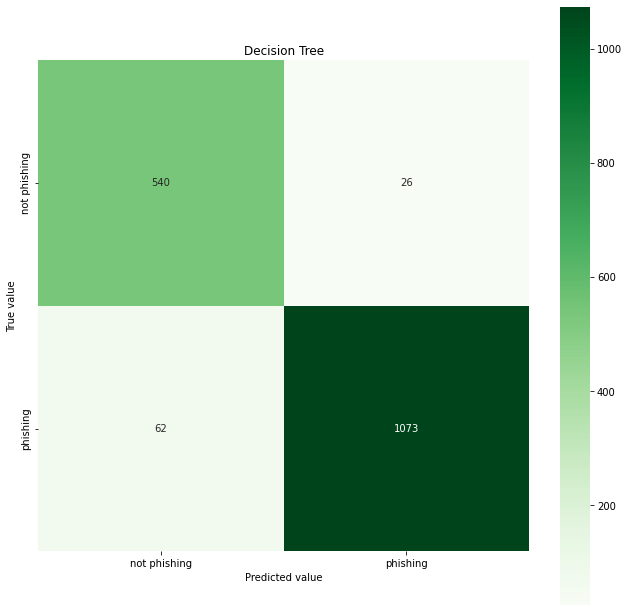

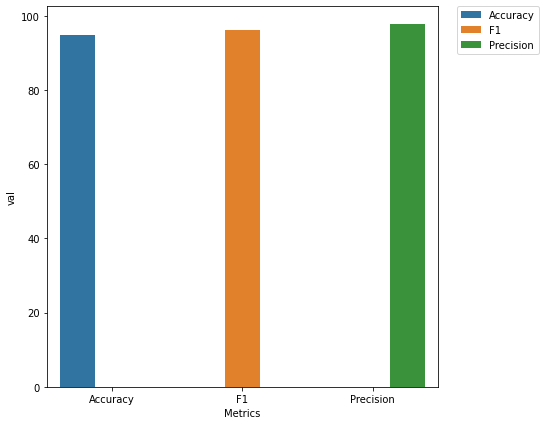

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Decision Tree is:  94.83 %
F1 score of the model on Decision Tree is:  96.06 %
Precision score of the model on Decision Tree is:  97.63 %


In [245]:
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
cf_mat(dt_classifier,"Decision Tree","Greens")

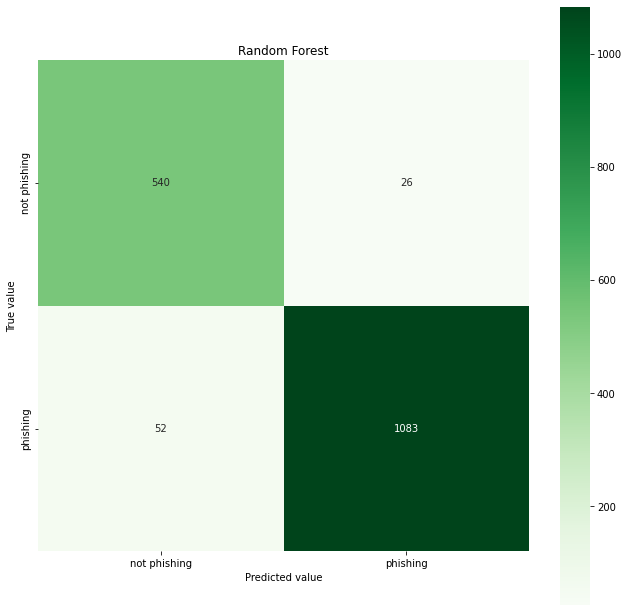

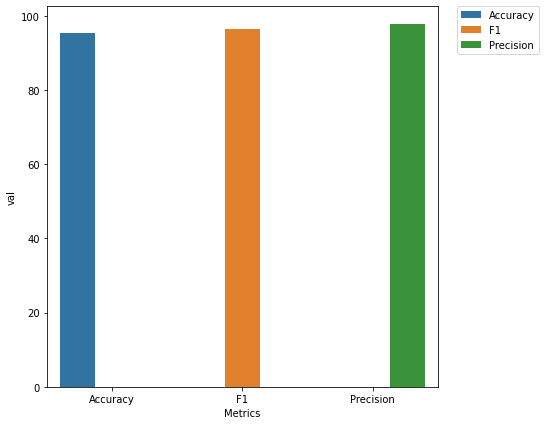

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Random Forest is:  95.41 %
F1 score of the model on Random Forest is:  96.52 %
Precision score of the model on Random Forest is:  97.66 %


In [246]:
rf_classifier = RandomForestClassifier(random_state=0, criterion='gini', n_estimators=100)
cf_mat(rf_classifier,"Random Forest","Greens")

In [247]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
print('Original data shape,', x_train_o.shape)
x_train, y_train = rus.fit_resample(x_train_o,y_train_o)
print('Resampled data shape,', x_train.shape)

Original data shape, (5100, 8)
Resampled data shape, (3380, 8)


In [248]:
np.sum(y_train)

1690

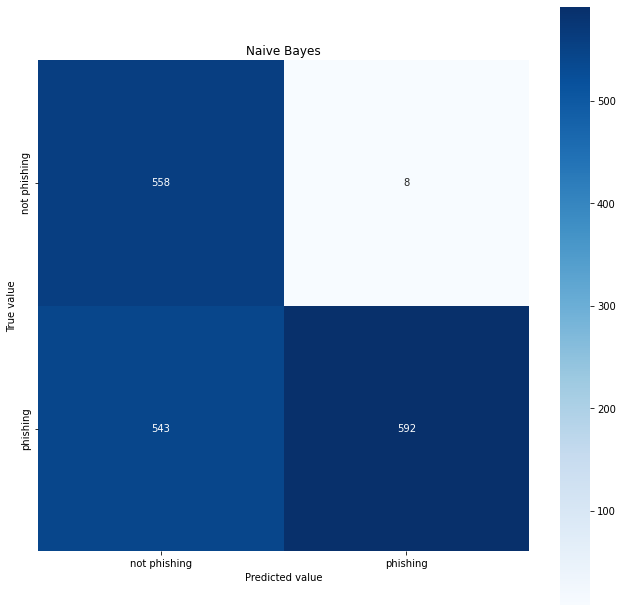

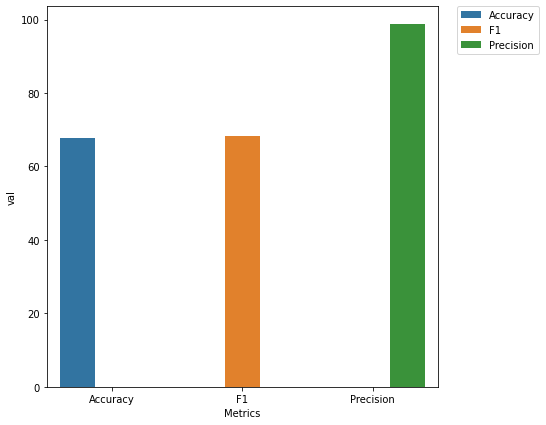

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Naive Bayes is:  67.61 %
F1 score of the model on Naive Bayes is:  68.24 %
Precision score of the model on Naive Bayes is:  98.67 %


In [249]:
nb_classifier = GaussianNB()
cf_mat(nb_classifier,"Naive Bayes","Blues")

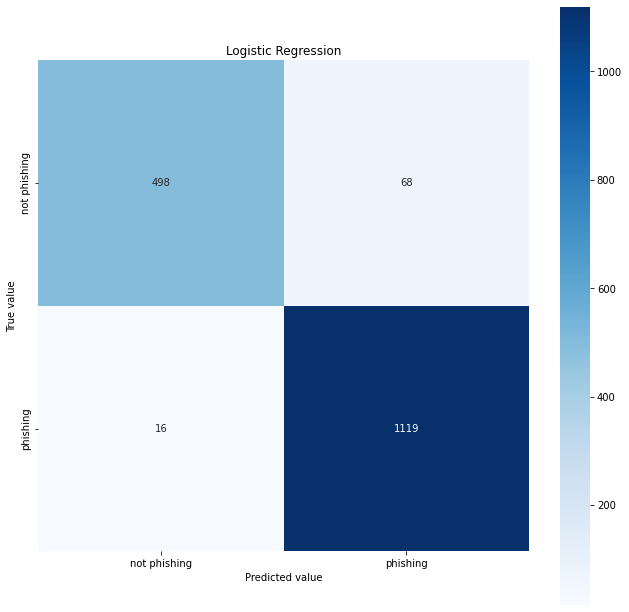

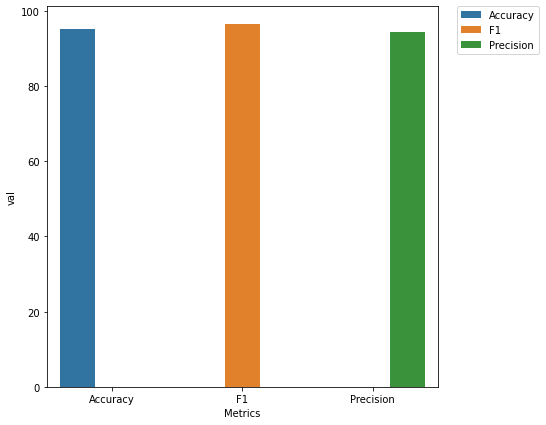

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Logistic Regression is:  95.06 %
F1 score of the model on Logistic Regression is:  96.38 %
Precision score of the model on Logistic Regression is:  94.27 %


In [250]:
lr_classifier = LogisticRegression()
cf_mat(lr_classifier,"Logistic Regression","Blues")

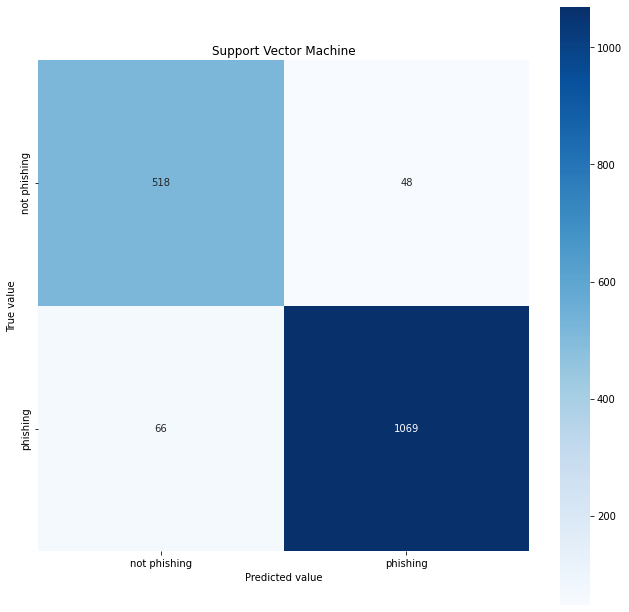

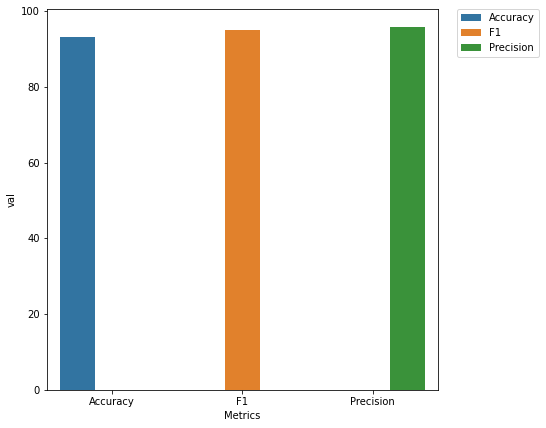

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Support Vector Machine is:  93.30 %
F1 score of the model on Support Vector Machine is:  94.94 %
Precision score of the model on Support Vector Machine is:  95.70 %


In [251]:
ker_classifier = SVC(kernel='rbf', random_state=0)
cf_mat(ker_classifier,"Support Vector Machine","Blues")

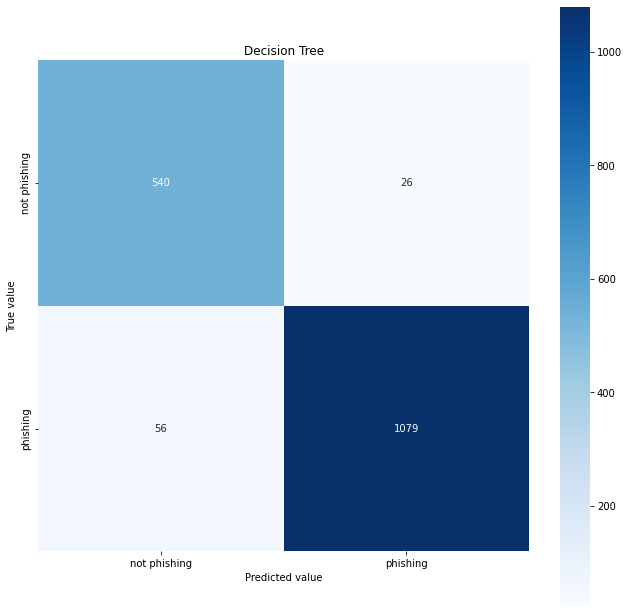

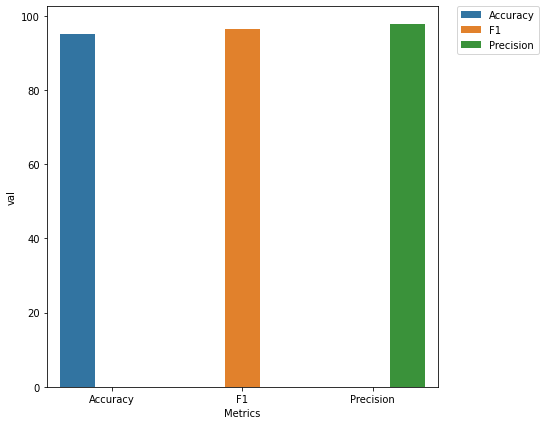

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Decision Tree is:  95.18 %
F1 score of the model on Decision Tree is:  96.34 %
Precision score of the model on Decision Tree is:  97.65 %


In [252]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
cf_mat(dt_classifier,"Decision Tree","Blues")

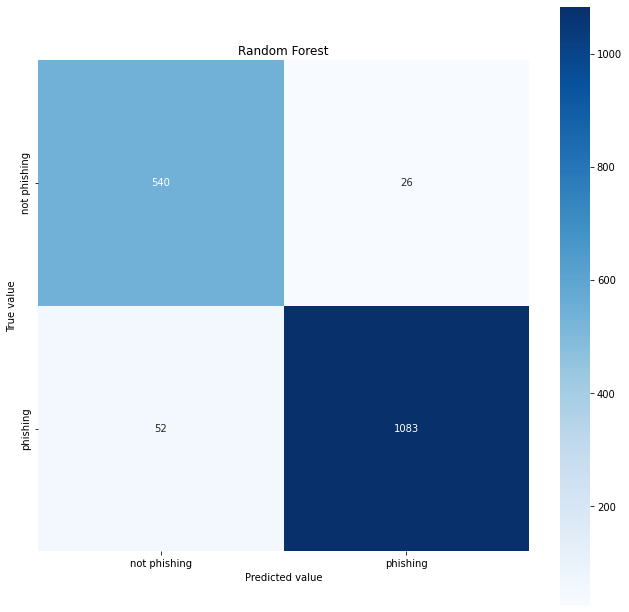

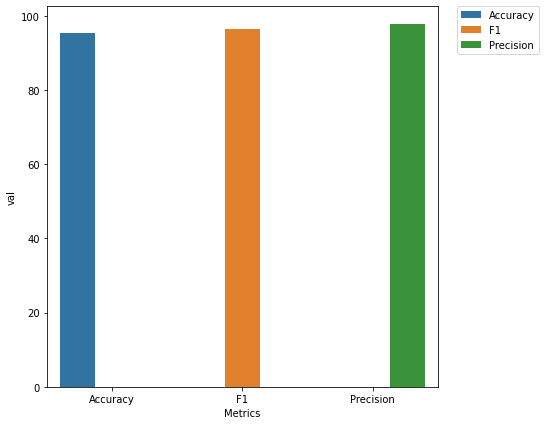

<Figure size 792x792 with 0 Axes>

Accuracy of the model on Random Forest is:  95.41 %
F1 score of the model on Random Forest is:  96.52 %
Precision score of the model on Random Forest is:  97.66 %


In [253]:
rf_classifier = RandomForestClassifier(random_state=0, criterion='gini', n_estimators=100)
cf_mat(rf_classifier,"Random Forest","Blues")